<a href="https://colab.research.google.com/github/Avit-hodibu/Covid-19-Corona-Website/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression:

supervise ML algo


type:
- simple LR: one input and one output
- multiple LR: multiple input and one output
- polynominal LR: non linear data

## simple LR:
y= mx +c
where m = slope, c= y intercept

- plot the data
- see if it is linear
- draw best fit line minimum error


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

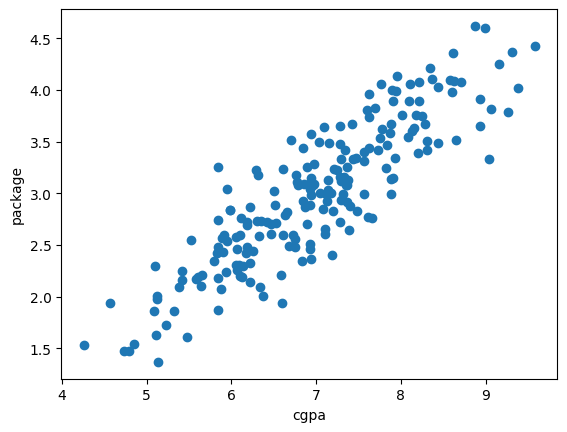

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
x= df.iloc[:,0:1]
y= df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#train algo has input shape of 1,1
#but what we are sending is 1D data so, we need to reshape
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package')

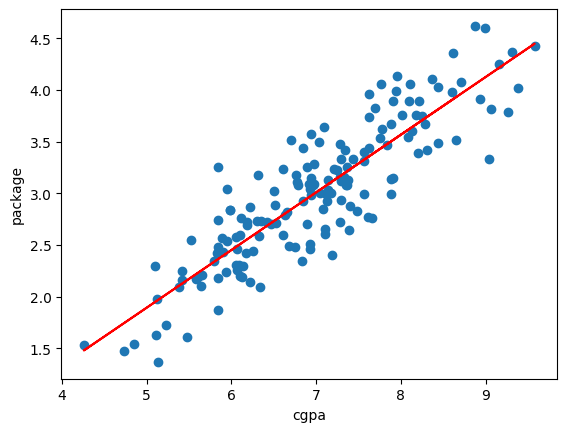

In [ ]:
#let see line how LR draw
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
#y=mx+c
# package = m * cgpa + c
m = lr.coef_
c = lr.intercept_
print('slope=', m)
print('intercept=', c)

slope= [0.55795197]
intercept= -0.8961119222429144


Simplly find mathamatical relationship.

m = weightage (depended)

more m more cgpa depened

less m less cgpa depened  


We need to find the value of m and c which draw line closer to all points.

m and c value can be find two method:

1. closed form solution: if you can make mathematical formula then it's closed form.

An expression or equation is in closed form if it is formed with constants, variables and a finite set of basic functions connected by arithmetic operations (+, −, ×, /, and integer powers) and function composition.

direct formula= odinary least square

2. non-closed form solution: we need to used approm to reach to value.

approx. based technique= gradient descent


Why to use gradient descent when we have direct formula
- in higher dimension it is difficult to find using formula so we need gradient descent


What we want to use
- OLS use linear regression class
- gradient descent use SGDRegressor class




formula:

b= mean y - m. mean X

m = sum i to n (Xi- mean X)(yi - mean y)/ sum i to n (Xi - mean X)^2


 Best fix line = line that passes near from every point.

 distance between line and point =Di.

loss function J =Error function E = sum i to n (Di)^2

1. square to penilized the outliers
2. differentiation at point

we need m and b which minimized the loss function.

what does the distance between point and line represent?

it show the according to line point should be line but acutually in reality it is in point. so, my line is making error.

yi = actual point , y hat = predicted point

```Di = (yi - y hat)```

```E= sum i to n (yi - y hat)^2```

we need minmum E.

yi hat = m Xi + b

E(m,b)= sum i to n (yi- (m Xi + b))^2  

Let's  consider b=0 is constant.Now, it only depend on m.

E(m)= sum i to n (yi- (m Xi))^2

then when increasing and decreasing the value of m give parabolic Error value

Now, let's  consider m=0 is constant.Now, it only depend on b.

E(b)= sum i to n (yi- (b))^2

then when increasing and decreasing the value of b give parabolic Error value

our error function with respect to m and b be like gradient descent.


maxima and minima:

in minima slope is zero

derivative of m and b

slope = derivative = 0

E(x)= dE/dx = 0

f(x,y)

```
dE/dm = 0, dE/db = 0
```

by sloving this equation we slove and find the value of m and b.

dE/db = d (sum i to n (yi- m. Xi- b)^2)/db = 0

= sum i to n d(yi- m. Xi - b)^2/db = 0

= sum i to n -2(yi- m. Xi - b) = 0

= sum i to n (yi- m. Xi - b) = 0

= sum i to n (yi)/n - sum i to n (mXi)/n - sum i to n (b)/n = 0/n

= mean y - m . mean X - nb/n =0

= mean y - m . mean X = b

same will be done for dE/bd =0

this will give

m=  sum i to n (Xi - mean X)(yi - mean y)/ sum i to n (Xi- mean X)^2







In [7]:
class myLR:
  def __init__(self):
    self.m= None
    self.b= None

  def fit(self,X_train,y_train):
    num=0
    den=0
    # for m
    for i in range(X_train.shape[0]):
      num= num + (X_train[i] - X_train.mean())*(y_train[i] - y_train.mean())
      den= den + (X_train[i] - X_train.mean())**2
    self.m= num/den
    # for b
    self.b= y_train.mean() - (self.m * X_train.mean())

  def predict(self,X_test):
    return self.m * X_test + self.b

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('placement.csv')

In [10]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [11]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
lr = myLR()

In [14]:
lr.fit(X_train,y_train)

In [15]:
lr.predict(X_test[0])

3.891116009744203

# Regression Metrics

MAE(mean absolute error):

absolute error = actual value- predicted value = yi - y hat

mean absolute error = sum i to n absolute error/ n

Ad:
- mea unit is equal to unit of y (output)
- robust outliers

Dis:
- graph is not differeiatable